In [3]:
#%reset
# %matplotlib inline
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np, histogram.hdf as hh, histogram as H
# from scipy.interpolate import interp1d
# from scipy.interpolate import pchip
# from scipy.special import erf
# from scipy.special import erfc
# from scipy.optimize import minimize,curve_fit
# from lmfit import Model
# import con_decon_package as F
# import makingRF3 as M
# import time
from pylab import genfromtxt;
# import warnings
# from mpl_toolkits.mplot3d import Axes3D
# from scipy import stats

In [ ]:
lines1 = genfromtxt("Gaussian Convolved DFT(E,I,GaussianRF).dat")
# lines=lines[:,0] # only convolved DFT
lines=lines1[:,1] # convolved+noisy DFT
Nx = lines.shape[0]

A=lines1[:,2]

In [11]:
print A.shape[1]

IndexError: tuple index out of range

In [4]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

In [5]:
x =np.arange(-50,240,0.1)                                         
sig= gauss(x,1,0,5)

print sig

[  1.53891973e-23   1.87926491e-23   2.29396255e-23 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [35]:
mu=5.0
# p_lambda_start = 0.001#1e-4
# p_lambda_end= p_lambda_start #1e-2
p_gamma_start = 1e-4
p_gamma_end= p_gamma_start#1e-2
nits=4.0
max_cg = 50.0
m_spa  = 1

# lambda_vary=np.arrange=([0.001, 0.0001, 1,5,10,20,50,70,100,200,300,500,1000,5000])
# lambda_vary=np.arrange=([0.001,20,200,1000,5000])
lambda_vary=np.arrange=([1000])

In [36]:
DFT=genfromtxt('extended DFT (E,DFT).dat')
DFT_I=DFT[:,1]
DFT_I=DFT_I/np.sum(DFT_I)
DFT_E=DFT[:,0]

In [46]:
#Convolved DFT with gaussian
Con_DFT_gausian=np.convolve(DFT_I, sig, 'full')

<IPython.core.display.Javascript object>


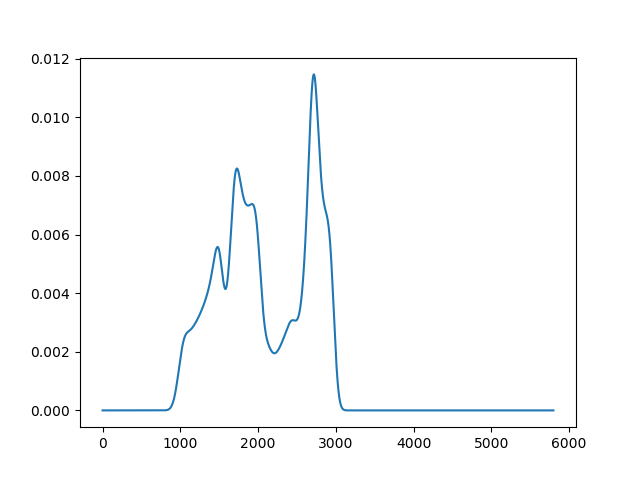

In [47]:
plt.figure()
plt.plot(Con_DFT_gausian)

2900
2900


<IPython.core.display.Javascript object>


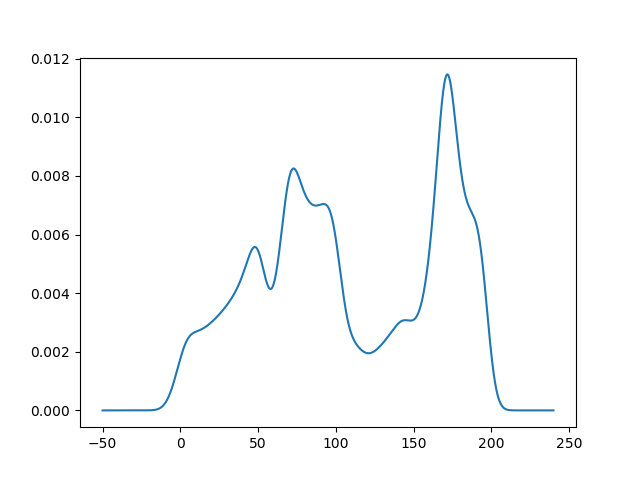

In [55]:
Con_DFT_gausian1=Con_DFT_gausian[500:500+len(sig)]
print len(Con_DFT_gausian1)
print len(sig)
plt.figure()
plt.plot(DFT_E,Con_DFT_gausian1)

In [57]:
np.savetxt('Gaussian Convolved DFT(E,I,GaussianRF).dat', np.c_[DFT_E,Con_DFT_gausian1,sig])

<IPython.core.display.Javascript object>


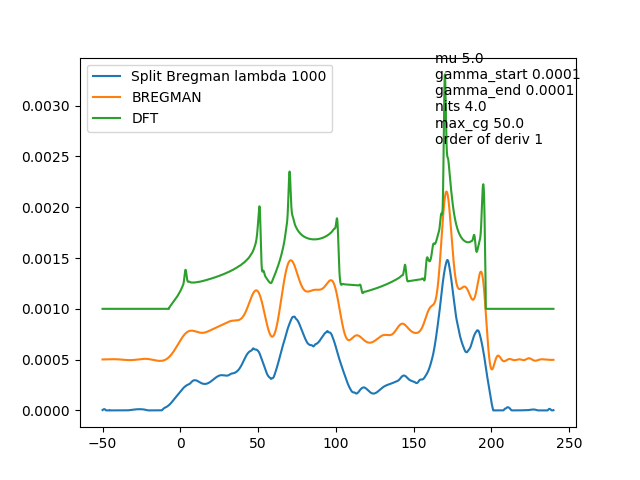

<function matplotlib.pyplot.show>

In [77]:
# D_Breg=genfromtxt('Deconvolvd_300_Bregman.dat')
D_Breg=genfromtxt('Bregman Reconstructed DFT(E,I).dat')
Breg=D_Breg[:,1]
Breg=Breg/np.sum(Breg)
E_Breg=D_Breg[:,0]
Ei=genfromtxt('Bregman_split_300(E,uk).dat')
Ei=genfromtxt('Bregman_split_300(E,uk).dat')
E=Ei[:,0]
plt.figure('Bregman_split_300(E,uk).dat')
for i in lambda_vary:
    R=genfromtxt("DFT_bregman_split_lambda {}_(recons, residual_vec).dat".format(i))
    R=R[:,0]
    R[R<0]=0
    R=R/np.sum(R)
    plt.plot(DFT_E,R, label='Split Bregman lambda {}'.format(i))
    plt.plot(DFT_E,Breg+0.0005, label='BREGMAN')
    plt.plot(DFT_E,DFT_I+0.001, label='DFT')
    plt.legend()
#     plt.ylim(0,0.002)
    plt.figtext(0.68,0.70,'mu {}\ngamma_start {}\ngamma_end {}\nnits {}\nmax_cg {}\norder of deriv {}'.format (mu,p_gamma_start,p_gamma_end,nits,max_cg,m_spa))
plt.show

In [1]:
RF3_read = genfromtxt("RF3_save.txt")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Reading the Resolution Function (RF calculated for Ei=300) files 

In [2]:
RF3_read = genfromtxt("RF3_save.txt")


# plotting the saved RF 

<IPython.core.display.Javascript object>


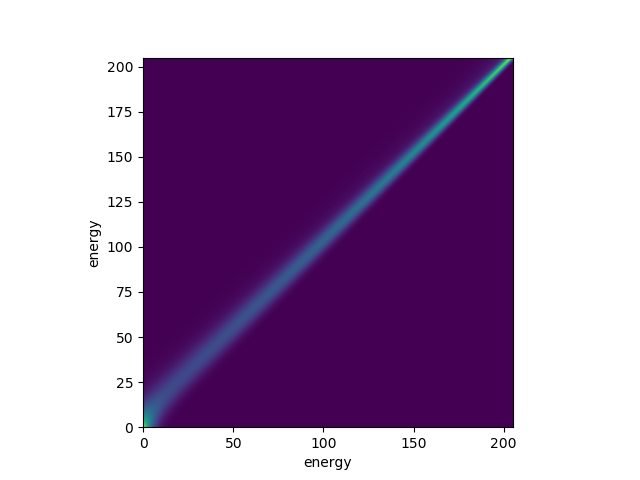

In [3]:
plt.figure('2D RF')
plt.imshow(RF3_read[::-1], extent=[0, 205, 0,205])
plt.xlabel('energy')
plt.ylabel('energy')
plt.show()

# Reading  saved DFT file 

<IPython.core.display.Javascript object>


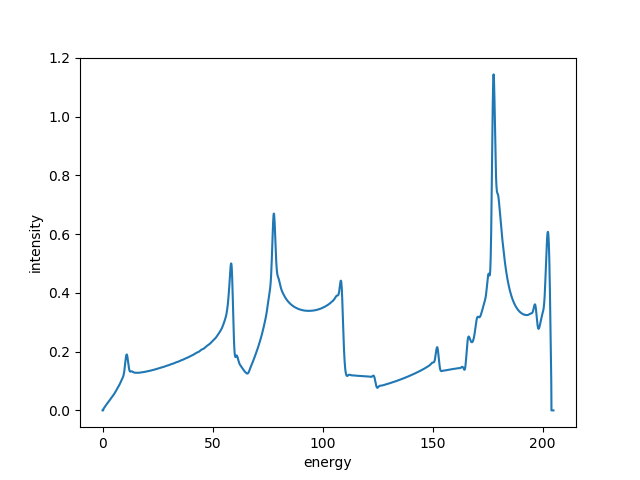

In [4]:
read_DFT = genfromtxt("DFT.dat")
read_DFT_x=read_DFT[:,0]

read_DFT_y=read_DFT[:,1]

plt.figure('original DFT')
plt.plot(read_DFT_x,read_DFT_y)
plt.xlabel('energy')
plt.ylabel('intensity')
plt.show()

# convolution of the DFT with RF_300

<IPython.core.display.Javascript object>


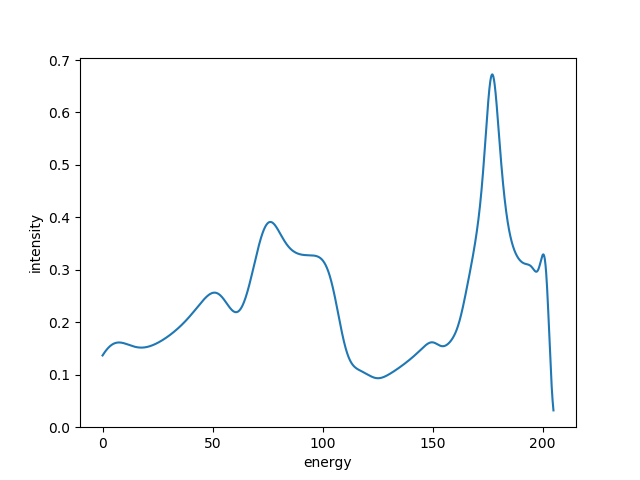

In [5]:
convolve_DFT=F.convolve_NS (read_DFT_y, RF3_read)
plt.figure('convolved DFT')
plt.plot(read_DFT_x, convolve_DFT)
plt.xlabel('energy')
plt.ylabel('intensity')
plt.show()

# Adding the noise to the convolved_DFT_300

<IPython.core.display.Javascript object>


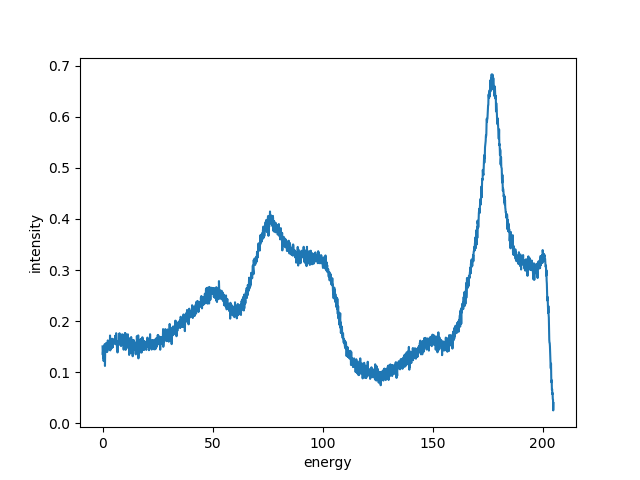

In [6]:
noisyConvolve_DFT=convolve_DFT+ 0.008 * np.random.normal(size=len(convolve_DFT))

plt.figure('noisy convolved DFT')
plt.plot(read_DFT_x, noisyConvolve_DFT)
plt.xlabel('energy')
plt.ylabel('intensity')
plt.show()

In [7]:
np.savetxt('Convolved and noisy DFT.dat', np.c_[convolve_DFT,noisyConvolve_DFT])

# Deconvolved the noisy_convolved_DFT to reconstruct the original DFT

<IPython.core.display.Javascript object>


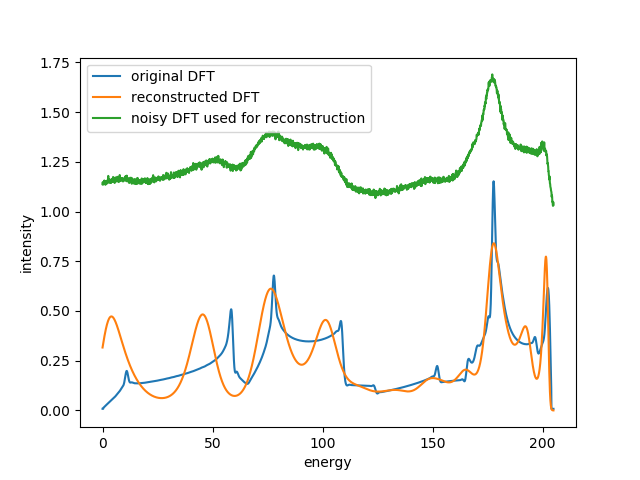

In [8]:
ini3=(np.sum(noisyConvolve_DFT,0)/len(noisyConvolve_DFT)) * np.ones(len(noisyConvolve_DFT))#initial guess
   
deconvolved_DFT,error=F.deconvolve_NS(noisyConvolve_DFT,RF3_read,ini3,'iteration',10)
deconvolved_DFT[deconvolved_DFT<0]=0
deconvolved_DFT[deconvolved_DFT>1.75]=0

plt.figure('Result')
plt.plot(read_DFT_x,read_DFT_y+0.008, label='original DFT')
plt.plot(read_DFT_x, deconvolved_DFT, label='reconstructed DFT')
plt.plot (read_DFT_x, noisyConvolve_DFT+1, label='noisy DFT used for reconstruction')
plt.xlabel('energy')
plt.ylabel('intensity')
plt.legend()
plt.show()

# Error calculation

<IPython.core.display.Javascript object>


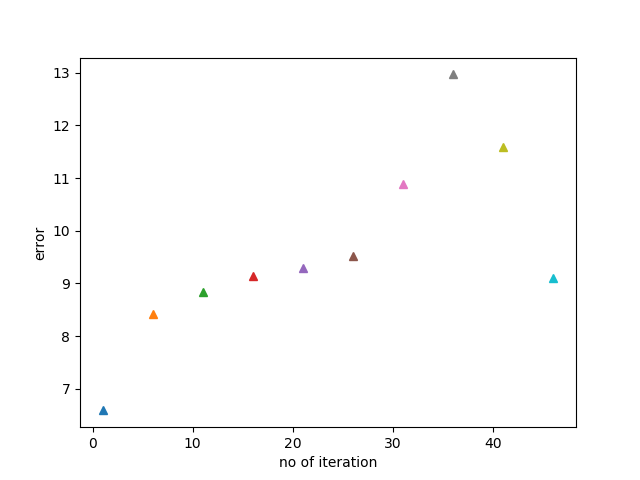

In [10]:
no_iteration=np.arange(1,50,5)
plt.figure('Error')
for i in no_iteration:  
    
    output=F.deconvolve_NS(noisyConvolve_DFT,RF3_read,ini3,'iteration',i)
    
    convolve_output=F.convolve_NS(output,RF3_read)+0.008 * np.random.normal(size=len(convolve_DFT))
    
    residual_sum=np.sqrt((np.sum(( noisyConvolve_DFT-convolve_output)**2))/len(convolve_output)) 
    plt.plot( i, residual_sum, '^' )
plt.xlabel('no of iteration')
plt.ylabel('error')
plt.show()